# Par-Session-2 Solution: Reduction Operations and Optimization

This notebook provides complete solutions for the Par-session-2 exercises.
It demonstrates reduction operations and parallel optimization techniques.

## 1. Setup and Library Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from functools import reduce
import operator

%matplotlib inline

print("Parallel Computing - Reduction Operations")
print(f"NumPy version: {np.__version__}")

Parallel Computing - Reduction Operations
NumPy version: 2.4.0


## 2. Reduction Operations Fundamentals

In [2]:
# SOLUTION: Basic reduction operations
print("\n=== REDUCTION OPERATIONS ===")

data = np.array([1, 2, 3, 4, 5, 6, 7, 8])

print(f"Data: {data}")
print(f"\nSum: {np.sum(data)}")
print(f"Product: {np.prod(data)}")
print(f"Max: {np.max(data)}")
print(f"Min: {np.min(data)}")
print(f"Mean: {np.mean(data)}")
print(f"Std Dev: {np.std(data)}")


=== REDUCTION OPERATIONS ===
Data: [1 2 3 4 5 6 7 8]

Sum: 36
Product: 40320
Max: 8
Min: 1
Mean: 4.5
Std Dev: 2.29128784747792


In [3]:
# SOLUTION: MPI Reduce operations
mpi_reduce_example = """
from mpi4py import MPI
import numpy as np

comm = MPI.COMM_WORLD
rank = comm.Get_rank()
size = comm.Get_size()

# Each process has local data
local_data = np.array([rank+1, rank+2, rank+3])
local_sum = np.sum(local_data)

print(f"Process {rank}: local_data={local_data}, local_sum={local_sum}")

# Reduce: Sum all local sums to rank 0
global_sum = comm.reduce(local_sum, op=MPI.SUM, root=0)

if rank == 0:
    print(f"Global sum: {global_sum}")

# AllReduce: Sum and broadcast to all
global_sum_all = comm.allreduce(local_sum, op=MPI.SUM)
print(f"Process {rank}: global_sum_all={global_sum_all}")
"""

print("\n=== MPI REDUCE OPERATIONS ===")
print(mpi_reduce_example)


=== MPI REDUCE OPERATIONS ===

from mpi4py import MPI
import numpy as np

comm = MPI.COMM_WORLD
rank = comm.Get_rank()
size = comm.Get_size()

# Each process has local data
local_data = np.array([rank+1, rank+2, rank+3])
local_sum = np.sum(local_data)

print(f"Process {rank}: local_data={local_data}, local_sum={local_sum}")

# Reduce: Sum all local sums to rank 0
global_sum = comm.reduce(local_sum, op=MPI.SUM, root=0)

if rank == 0:
    print(f"Global sum: {global_sum}")

# AllReduce: Sum and broadcast to all
global_sum_all = comm.allreduce(local_sum, op=MPI.SUM)
print(f"Process {rank}: global_sum_all={global_sum_all}")



## 3. Parallel Reduction Algorithms

In [4]:
# SOLUTION: Sequential reduction
def sequential_sum(data):
    """Sequential sum reduction"""
    result = 0
    for value in data:
        result += value
    return result

# SOLUTION: Tree-based reduction
def tree_reduction(data):
    """Simulate tree-based parallel reduction"""
    # This simulates how MPI reduces data in a tree structure
    if len(data) == 1:
        return data[0]
    
    # Pair up elements and reduce
    reduced = []
    for i in range(0, len(data), 2):
        if i + 1 < len(data):
            reduced.append(data[i] + data[i+1])
        else:
            reduced.append(data[i])
    
    return tree_reduction(reduced)

print("\n=== REDUCTION ALGORITHMS ===")
data = np.arange(1, 9)
print(f"Data: {data}")
print(f"Sequential sum: {sequential_sum(data)}")
print(f"Tree reduction: {tree_reduction(list(data))}")
print(f"NumPy sum: {np.sum(data)}")


=== REDUCTION ALGORITHMS ===
Data: [1 2 3 4 5 6 7 8]
Sequential sum: 36
Tree reduction: 36
NumPy sum: 36


In [5]:
# SOLUTION: Performance comparison
print("\n=== PERFORMANCE ANALYSIS ===")

sizes = [10**i for i in range(2, 8)]
seq_times = []
tree_times = []
np_times = []

for size in sizes:
    data = np.arange(size)
    
    # Sequential
    start = time.time()
    for _ in range(100):
        sequential_sum(data)
    seq_times.append(time.time() - start)
    
    # Tree reduction
    start = time.time()
    for _ in range(100):
        tree_reduction(list(data))
    tree_times.append(time.time() - start)
    
    # NumPy
    start = time.time()
    for _ in range(100):
        np.sum(data)
    np_times.append(time.time() - start)

print(f"\nSize\t\tSequential\tTree\t\tNumPy")
for i, size in enumerate(sizes):
    print(f"{size}\t\t{seq_times[i]:.6f}\t{tree_times[i]:.6f}\t{np_times[i]:.6f}")


=== PERFORMANCE ANALYSIS ===

Size		Sequential	Tree		NumPy
100		0.000806	0.000865	0.000150
1000		0.007663	0.008537	0.000577
10000		0.071902	0.089161	0.000225
100000		0.713820	0.963045	0.001160
1000000		7.075254	9.970088	0.008942
10000000		68.407382	96.041830	0.138010


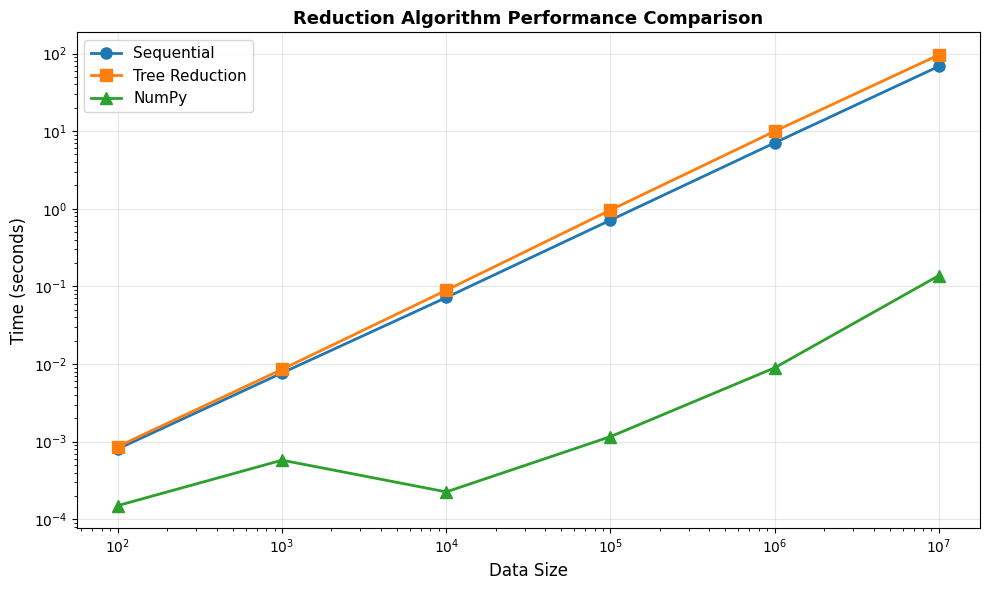

In [6]:
# SOLUTION: Visualize performance
fig, ax = plt.subplots(figsize=(10, 6))

ax.loglog(sizes, seq_times, 'o-', label='Sequential', linewidth=2, markersize=8)
ax.loglog(sizes, tree_times, 's-', label='Tree Reduction', linewidth=2, markersize=8)
ax.loglog(sizes, np_times, '^-', label='NumPy', linewidth=2, markersize=8)

ax.set_xlabel('Data Size', fontsize=12)
ax.set_ylabel('Time (seconds)', fontsize=12)
ax.set_title('Reduction Algorithm Performance Comparison', fontsize=13, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 4. Advanced Reduction Operations

In [7]:
# SOLUTION: Custom reduction operations
advanced_reduce = """
from mpi4py import MPI
import numpy as np

comm = MPI.COMM_WORLD
rank = comm.Get_rank()
size = comm.Get_size()

# Example 1: Find maximum value and its rank
local_value = rank * 10 + 5
max_value = comm.reduce(local_value, op=MPI.MAX, root=0)

if rank == 0:
    print(f"Maximum value: {max_value}")

# Example 2: Logical AND operation
local_flag = (rank % 2 == 0)  # True for even ranks
global_flag = comm.allreduce(local_flag, op=MPI.LAND)
print(f"Process {rank}: All even? {global_flag}")

# Example 3: Custom operation (sum of squares)
local_data = np.array([rank+1, rank+2])
local_sum_sq = np.sum(local_data ** 2)
global_sum_sq = comm.allreduce(local_sum_sq, op=MPI.SUM)
print(f"Process {rank}: Global sum of squares = {global_sum_sq}")
"""

print("\n=== ADVANCED REDUCTION OPERATIONS ===")
print(advanced_reduce)


=== ADVANCED REDUCTION OPERATIONS ===

from mpi4py import MPI
import numpy as np

comm = MPI.COMM_WORLD
rank = comm.Get_rank()
size = comm.Get_size()

# Example 1: Find maximum value and its rank
local_value = rank * 10 + 5
max_value = comm.reduce(local_value, op=MPI.MAX, root=0)

if rank == 0:
    print(f"Maximum value: {max_value}")

# Example 2: Logical AND operation
local_flag = (rank % 2 == 0)  # True for even ranks
global_flag = comm.allreduce(local_flag, op=MPI.LAND)
print(f"Process {rank}: All even? {global_flag}")

# Example 3: Custom operation (sum of squares)
local_data = np.array([rank+1, rank+2])
local_sum_sq = np.sum(local_data ** 2)
global_sum_sq = comm.allreduce(local_sum_sq, op=MPI.SUM)
print(f"Process {rank}: Global sum of squares = {global_sum_sq}")



In [8]:
# SOLUTION: Scan operations (prefix reduction)
scan_example = """
from mpi4py import MPI
import numpy as np

comm = MPI.COMM_WORLD
rank = comm.Get_rank()
size = comm.Get_size()

# Each process has a value
local_value = rank + 1

# Scan: Prefix sum (cumulative sum up to this rank)
prefix_sum = comm.scan(local_value, op=MPI.SUM)
print(f"Process {rank}: prefix_sum = {prefix_sum}")

# ExScan: Exclusive scan (sum of all previous ranks)
exclusive_sum = comm.exscan(local_value, op=MPI.SUM)
if rank == 0:
    exclusive_sum = 0
print(f"Process {rank}: exclusive_sum = {exclusive_sum}")
"""

print("\n=== SCAN OPERATIONS ===")
print(scan_example)


=== SCAN OPERATIONS ===

from mpi4py import MPI
import numpy as np

comm = MPI.COMM_WORLD
rank = comm.Get_rank()
size = comm.Get_size()

# Each process has a value
local_value = rank + 1

# Scan: Prefix sum (cumulative sum up to this rank)
prefix_sum = comm.scan(local_value, op=MPI.SUM)
print(f"Process {rank}: prefix_sum = {prefix_sum}")

# ExScan: Exclusive scan (sum of all previous ranks)
exclusive_sum = comm.exscan(local_value, op=MPI.SUM)
if rank == 0:
    exclusive_sum = 0
print(f"Process {rank}: exclusive_sum = {exclusive_sum}")



## 5. Optimization Techniques

In [9]:
# SOLUTION: Optimization strategies
print("\n=== OPTIMIZATION STRATEGIES ===")
print("""
1. Minimize Communication:
   - Reduce frequency of collective operations
   - Use non-blocking operations
   - Overlap computation and communication

2. Efficient Reduction:
   - Use tree-based algorithms (O(log n) depth)
   - Combine multiple reductions
   - Use appropriate MPI operations

3. Load Balancing:
   - Distribute work evenly
   - Use dynamic load balancing
   - Monitor process utilization

4. Memory Optimization:
   - Use in-place operations
   - Minimize temporary allocations
   - Consider data locality

5. Scalability:
   - Test with different process counts
   - Measure strong and weak scaling
   - Identify bottlenecks

6. Debugging:
   - Use MPI profiling tools
   - Check for deadlocks
   - Verify correctness
""")


=== OPTIMIZATION STRATEGIES ===

1. Minimize Communication:
   - Reduce frequency of collective operations
   - Use non-blocking operations
   - Overlap computation and communication

2. Efficient Reduction:
   - Use tree-based algorithms (O(log n) depth)
   - Combine multiple reductions
   - Use appropriate MPI operations

3. Load Balancing:
   - Distribute work evenly
   - Use dynamic load balancing
   - Monitor process utilization

4. Memory Optimization:
   - Use in-place operations
   - Minimize temporary allocations
   - Consider data locality

5. Scalability:
   - Test with different process counts
   - Measure strong and weak scaling
   - Identify bottlenecks

6. Debugging:
   - Use MPI profiling tools
   - Check for deadlocks
   - Verify correctness




=== SCALABILITY ANALYSIS ===


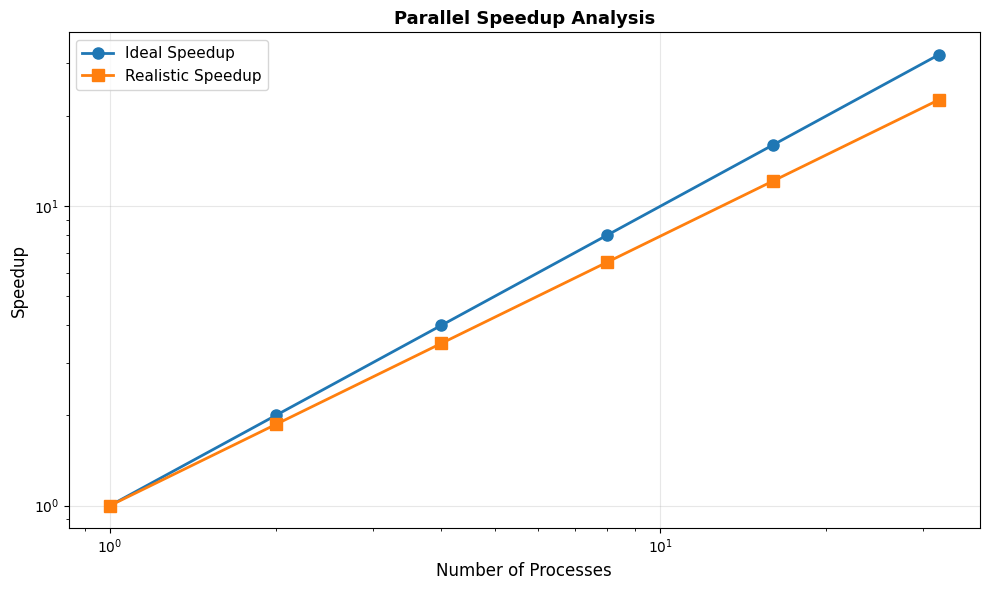

In [10]:
# SOLUTION: Scalability analysis
print("\n=== SCALABILITY ANALYSIS ===")

# Simulate speedup with different process counts
processes = np.array([1, 2, 4, 8, 16, 32])
ideal_speedup = processes  # Linear speedup
real_speedup = processes ** 0.9  # Realistic with overhead

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(processes, ideal_speedup, 'o-', label='Ideal Speedup', linewidth=2, markersize=8)
ax.plot(processes, real_speedup, 's-', label='Realistic Speedup', linewidth=2, markersize=8)

ax.set_xlabel('Number of Processes', fontsize=12)
ax.set_ylabel('Speedup', fontsize=12)
ax.set_title('Parallel Speedup Analysis', fontsize=13, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)
ax.set_xscale('log')
ax.set_yscale('log')

plt.tight_layout()
plt.show()

## 6. Key Concepts Summary

### Reduction Operations:
- **Sum**: Add all values
- **Product**: Multiply all values
- **Max/Min**: Find maximum/minimum
- **Logical AND/OR**: Combine boolean values
- **Custom**: User-defined operations

### MPI Reduction Functions:
- **reduce()**: Reduce to one process
- **allreduce()**: Reduce and broadcast
- **scan()**: Prefix reduction
- **exscan()**: Exclusive prefix reduction

### Algorithms:
- **Sequential**: O(n) time
- **Tree-based**: O(log n) depth
- **Butterfly**: O(log n) depth, all-to-all

### Performance Metrics:
- **Speedup**: Time(1) / Time(p)
- **Efficiency**: Speedup / p
- **Scalability**: How speedup changes with p
- **Amdahl's Law**: Speedup limit from serial portion